In [1]:
import pandas as pd
try:
    df = pd.read_csv('Walmart.csv')
    print("Success! Data loaded.")
    print(df.head()) 
except FileNotFoundError:
    print("Error: Make sure Walmart.csv is in C:\\Users\\hp\\Downloads\\archive")

Success! Data loaded.
   invoice_id   Branch         City                category unit_price  \
0           1  WALM003  San Antonio       Health and beauty     $74.69   
1           2  WALM048    Harlingen  Electronic accessories     $15.28   
2           3  WALM067  Haltom City      Home and lifestyle     $46.33   
3           4  WALM064      Bedford       Health and beauty     $58.22   
4           5  WALM013       Irving       Sports and travel     $86.31   

   quantity      date      time payment_method  rating  profit_margin  
0       7.0  05/01/19  13:08:00        Ewallet     9.1           0.48  
1       5.0  08/03/19  10:29:00           Cash     9.6           0.48  
2       7.0  03/03/19  13:23:00    Credit card     7.4           0.33  
3       8.0  27/01/19  20:33:00        Ewallet     8.4           0.33  
4       7.0  08/02/19  10:37:00        Ewallet     5.3           0.48  


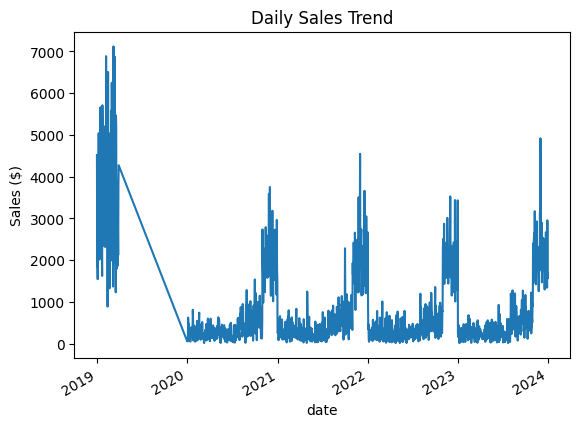

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
df['Total_Sales'] = df['unit_price'] * df['quantity']

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.dayofweek
df = df.dropna(subset=['Total_Sales'])
X = df[['unit_price', 'quantity', 'Month', 'Day']]
y = df['Total_Sales']
model = RandomForestRegressor().fit(X, y)

df.groupby('date')['Total_Sales'].sum().plot(kind='line', title='Daily Sales Trend')
plt.ylabel('Sales ($)')
plt.show()